DATA COLLECTION FROM MY SQL TO JUPYTER NOTEBOOK 

In [3]:
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt          

In [2]:
import mysql.connector
import pandas as pd
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="Scleral@22",
    database="blinkit"
)
cursor=conn.cursor()
cursor.execute("select * from main_table")
data=cursor.fetchall()

columns=[a[0] for a in cursor.description]
df=pd.DataFrame(data,columns=columns)

cursor.close()
conn.close()

DATA CORRECTION 

WE CAN SEE THAT SOME COLUMNS HAS NOT IMPORTED PROPERLY SUCH AS DELIVERY_STATUS, ACTUAL_DELIVERY_TIME,PROMISED_DELIVERY_TIME SO WE NEED TO CORRECT THE SYNTAX OF IT

In [4]:
df=df.applymap(lambda x:x.strip() if isinstance(x,str) else x )
df

C:\Users\sahil\AppData\Local\Temp\ipykernel_20104\2395911009.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df=df.applymap(lambda x:x.strip() if isinstance(x,str) else x )


,order_id,customer_id,order_date,order_time,promised_delivery_time,actual_delivery_time,delivery_status,total_price,payment_method,city,...,product_id,product_name,category,brand,mrp,price,margin_percentage,shelf_life_days,total_stock_received,total_damaged_stock
0,1961864118,30065862,2024-07-17,0 days 08:34:01,0 days 08:52:01,0 days 08:47:01,On Time,3197.07,Cash,Allahabad,...,642612,Pet Treats,Pet Care,Pillay-Ahuja,795.43,517.03,35.0,365,373,160
1,9185164487,45477575,2024-09-23,0 days 13:07:12,0 days 13:25:12,0 days 13:29:12,On Time,839.05,UPI,Vellore,...,741341,Eggs,Dairy & Breakfast,Prasad LLC,1154.80,923.84,20.0,7,332,180
2,9644738826,88067569,2023-11-24,0 days 16:16:56,0 days 16:34:56,0 days 16:33:56,On Time,440.23,Card,Gaya,...,561860,Orange Juice,Cold Drinks & Juices,Gupta Ltd,1249.69,874.78,30.0,180,305,180
3,5427684290,83298567,2023-11-20,0 days 05:00:39,0 days 05:17:39,0 days 05:18:39,On Time,2526.68,Cash,Asansol,...,602241,Nuts,Snacks & Munchies,Bahl-Pau,1502.38,976.55,35.0,90,324,176
4,3265154092,43367112,2023-03-18,0 days 16:29:51,0 days 16:49:51,0 days 16:48:51,On Time,3161.43,UPI,Gopalpur,...,681063,Mango Drink,Cold Drinks & Juices,Dass and Sons,458.97,321.28,30.0,180,320,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9690396315,46563355,2024-09-29,0 days 11:06:50,0 days 11:19:50,0 days 11:15:50,On Time,3891.07,Cash,Ajmer,...,812607,Potatoes,Fruits & Vegetables,Rege Group,555.53,416.65,25.0,3,273,186
4996,4927306668,97033691,2023-06-08,0 days 23:21:25,0 days 23:32:25,0 days 23:30:25,On Time,898.65,Wallet,Mysore,...,540618,Popcorn,Snacks & Munchies,Golla-Luthra,487.77,317.05,35.0,90,332,196
4997,1669690997,62600289,2023-12-25,0 days 15:46:20,0 days 16:05:20,0 days 16:10:20,On Time,1132.33,Cash,Udaipur,...,925482,Frozen Biryani,Instant & Frozen Food,Viswanathan-Sha,791.73,475.04,40.0,180,312,182
4998,5936301790,87059497,2024-06-21,0 days 19:09:09,0 days 19:23:09,0 days 19:26:09,On Time,3158.35,Cash,Jamshedpur,...,491314,Ice Cream,Instant & Frozen Food,Banerjee Inc,1622.40,973.44,40.0,180,278,184


CHECKING FOR NULL VALUES

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   order_id               5000 non-null   int64          
 1   customer_id            5000 non-null   int64          
 2   order_date             5000 non-null   object         
 3   order_time             5000 non-null   timedelta64[ns]
 4   delivery_status        5000 non-null   object         
 5   total_price            5000 non-null   float64        
 6   payment_method         5000 non-null   object         
 7   city                   5000 non-null   object         
 8   customer_segment       5000 non-null   object         
 9   total_orders           5000 non-null   int64          
 10  avg_order_value        5000 non-null   float64        
 11  feedback               5000 non-null   object         
 12  feedback_category      5000 non-null   object   

now we can see that all the string values has been striped correctly

In [6]:
df["actual_time"]=df["actual_delivery_time"].apply(lambda x:str(x).split()[2])
df["promised_time"]=df["promised_delivery_time"].apply(lambda x:str(x).split()[2])
df

,order_id,customer_id,order_date,order_time,promised_delivery_time,actual_delivery_time,delivery_status,total_price,payment_method,city,...,category,brand,mrp,price,margin_percentage,shelf_life_days,total_stock_received,total_damaged_stock,actual_time,promised_time
0,1961864118,30065862,2024-07-17,0 days 08:34:01,0 days 08:52:01,0 days 08:47:01,On Time,3197.07,Cash,Allahabad,...,Pet Care,Pillay-Ahuja,795.43,517.03,35.0,365,373,160,08:47:01,08:52:01
1,9185164487,45477575,2024-09-23,0 days 13:07:12,0 days 13:25:12,0 days 13:29:12,On Time,839.05,UPI,Vellore,...,Dairy & Breakfast,Prasad LLC,1154.80,923.84,20.0,7,332,180,13:29:12,13:25:12
2,9644738826,88067569,2023-11-24,0 days 16:16:56,0 days 16:34:56,0 days 16:33:56,On Time,440.23,Card,Gaya,...,Cold Drinks & Juices,Gupta Ltd,1249.69,874.78,30.0,180,305,180,16:33:56,16:34:56
3,5427684290,83298567,2023-11-20,0 days 05:00:39,0 days 05:17:39,0 days 05:18:39,On Time,2526.68,Cash,Asansol,...,Snacks & Munchies,Bahl-Pau,1502.38,976.55,35.0,90,324,176,05:18:39,05:17:39
4,3265154092,43367112,2023-03-18,0 days 16:29:51,0 days 16:49:51,0 days 16:48:51,On Time,3161.43,UPI,Gopalpur,...,Cold Drinks & Juices,Dass and Sons,458.97,321.28,30.0,180,320,184,16:48:51,16:49:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9690396315,46563355,2024-09-29,0 days 11:06:50,0 days 11:19:50,0 days 11:15:50,On Time,3891.07,Cash,Ajmer,...,Fruits & Vegetables,Rege Group,555.53,416.65,25.0,3,273,186,11:15:50,11:19:50
4996,4927306668,97033691,2023-06-08,0 days 23:21:25,0 days 23:32:25,0 days 23:30:25,On Time,898.65,Wallet,Mysore,...,Snacks & Munchies,Golla-Luthra,487.77,317.05,35.0,90,332,196,23:30:25,23:32:25
4997,1669690997,62600289,2023-12-25,0 days 15:46:20,0 days 16:05:20,0 days 16:10:20,On Time,1132.33,Cash,Udaipur,...,Instant & Frozen Food,Viswanathan-Sha,791.73,475.04,40.0,180,312,182,16:10:20,16:05:20
4998,5936301790,87059497,2024-06-21,0 days 19:09:09,0 days 19:23:09,0 days 19:26:09,On Time,3158.35,Cash,Jamshedpur,...,Instant & Frozen Food,Banerjee Inc,1622.40,973.44,40.0,180,278,184,19:26:09,19:23:09


In [7]:
df["reasons_if_delayed"].fillna("not_delayed",inplace=True)
df["reasons_if_delayed"]

C:\Users\sahil\AppData\Local\Temp\ipykernel_20104\1401322197.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reasons_if_delayed"].fillna("not_delayed",inplace=True)


0              
1       Traffic
2              
3       Traffic
4              
         ...   
4995           
4996           
4997    Traffic
4998    Traffic
4999    Traffic
Name: reasons_if_delayed, Length: 5000, dtype: object

In [8]:
df.drop("actual_delivery_time",axis=1,inplace=True)
df.drop("promised_delivery_time",axis=1,inplace=True)


we have deleted the columns actual_delivery and promised_delivery_time

EDA (EXPLORATORY DATA ANALYTICS)

In [9]:
import pandas as pd
from datetime import datetime
df['promised_time'] = pd.to_datetime(df['promised_time'].astype(str))
df['actual_time'] = pd.to_datetime(df['actual_time'].astype(str))

C:\Users\sahil\AppData\Local\Temp\ipykernel_20104\2402899727.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['promised_time'] = pd.to_datetime(df['promised_time'].astype(str))
C:\Users\sahil\AppData\Local\Temp\ipykernel_20104\2402899727.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['actual_time'] = pd.to_datetime(df['actual_time'].astype(str))


In [10]:
df["delay"]=(df["actual_time"]-df["promised_time"])
df["delay_minutes"]=df["delay"].dt.total_seconds()/60


In [11]:
b=[]
for i in df["delay_minutes"]:
    if i>0:
        b.append(i)
round(np.average(b),2)

10.97

so the avg_delay_minutes is 10.97 minutes

In [12]:
d=[]
for i in df["delivery_status"]:
    if i=="On Time":
        d.append(i)
        
round(len(d)/len(df["order_id"])*100,2) 

69.4

from the total ordes the 69.4 % orders are on time and 30.6 % get delayed

In [13]:
df["hours"]=df["order_time"].dt.components["hours"]

<function matplotlib.pyplot.show(close=None, block=None)>

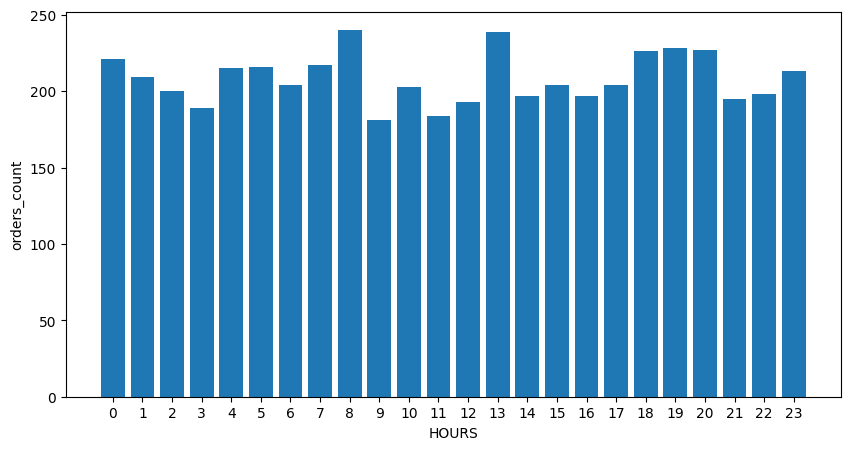

In [14]:
counts=df["hours"].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(counts.index,counts.values)
plt.xlabel("HOURS")
plt.ylabel("orders_count")
plt.xticks(counts.index)
plt.show

so we can see that max orders are getting places in 8.00 am and 1.00 pm and 6,7,8 and late night 12.00 am in decreasing order

In [15]:
reasons=df["reasons_if_delayed"].value_counts().sort_index()
reasons

reasons_if_delayed
           1902
Traffic    3098
Name: count, dtype: int64

so the reason for the delay is mainly traffic

In [16]:
df["km"]=round(df["distance_km"])
df["delay_minutes"]=df["delay_minutes"].apply(lambda x:0 if x<0 else x)
avg_delay_by_km = df.groupby('km')['delay_minutes'].mean().reset_index()
avg_delay_by_km

,km,delay_minutes
0,0.0,2.000000
1,1.0,6.657872
2,2.0,5.341085
3,3.0,6.448179
4,4.0,8.072386
5,5.0,8.214145


In [17]:
df1=pd.DataFrame()
df1["km"]=round(df["distance_km"])
df1["delay_minutes"]=df["delay_minutes"].apply(lambda x:0 if x<0 else x)
df1

,km,delay_minutes
0,1.0,0.0
1,4.0,4.0
2,3.0,0.0
3,3.0,1.0
4,2.0,0.0
...,...,...
4995,3.0,0.0
4996,1.0,0.0
4997,2.0,5.0
4998,2.0,3.0


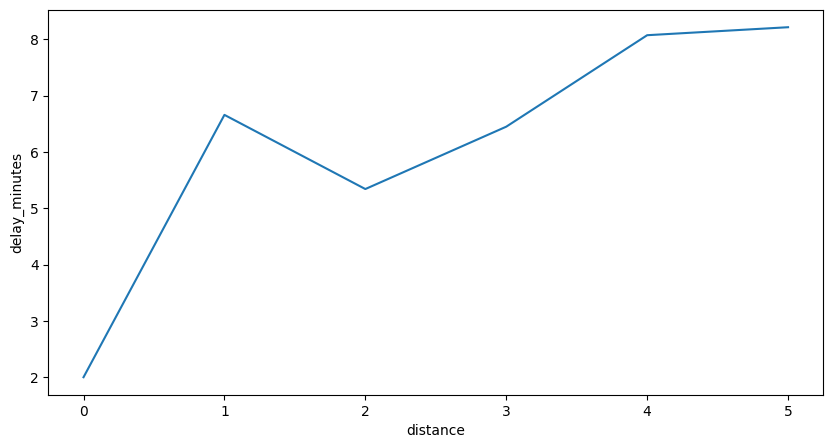

In [18]:
avg_delay_by_km = df.groupby('km')['delay_minutes'].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(avg_delay_by_km["km"],avg_delay_by_km["delay_minutes"])
plt.xlabel("distance")
plt.ylabel("delay_minutes")
plt.show()


so it is obviuos that if distance increases the delay also increaes

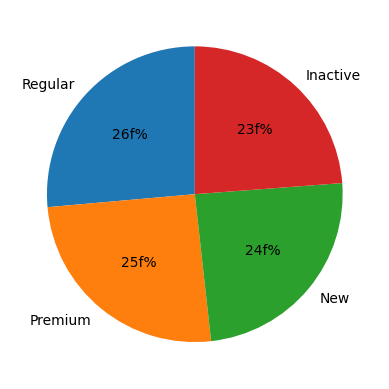

In [19]:
segment_counts=df["customer_segment"].value_counts()
plt.pie(segment_counts,labels=segment_counts.index,autopct="%.if%%",startangle=90)
plt.show()

there 26% regular consumers and 23% inactive users and 24% new consumers and 25% premium consumers

In [20]:
popular_payment_method=df.groupby("payment_method")["order_id"].count().reset_index()
df3=pd.DataFrame(popular_payment_method)
df3

,payment_method,order_id
0,Card,1285
1,Cash,1257
2,UPI,1214
3,Wallet,1244


<BarContainer object of 4 artists>

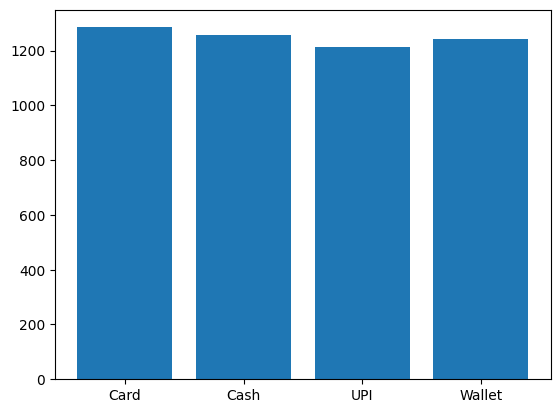

In [21]:
plt.bar(df3["payment_method"],df3["order_id"])

so most of the payment was done by card followed by cash and wallet and upi

In [22]:
cities=df.groupby("city")["order_id"].count().reset_index()
n=cities.sort_values(by="order_id",ascending=False).head(5)
n["city"]

218           Orai
80         Deoghar
97     Gandhinagar
207        Nandyal
248         Ratlam
Name: city, dtype: object

top 5 performing cities are Orai,Deoghar,Gandhinagar,Nandyal,Ratlam

In [23]:
x=df.groupby(df["product_name"])["order_id"].count().reset_index()
x=x.sort_values(by="order_id",ascending=False).head(20)
x

,product_name,order_id
36,Pet Treats,233
46,Toilet Cleaner,205
14,Cough Syrup,190
28,Lotion,188
18,Dish Soap,184
49,Vitamins,183
1,Baby Wipes,176
7,Cat Food,152
39,Pulses,137
4,Bread,135


top 20 bestselling items are Pet Treats	Toilet Cleaner  Cough Syrup	Lotion Dish Soap Vitamins Baby Wipes Cat Food Pulses Bread Eggs	Biscuits Detergent Orange Juice	Frozen Biryani Dog Food	Baby Food Cola Potatoes	Onions

In [24]:
x=df.groupby(df["category"])["order_id"].count().reset_index()
x=x.sort_values(by="order_id",ascending=False).head(5)
x

,category,order_id
2,Dairy & Breakfast,566
5,Household Care,509
8,Pet Care,501
3,Fruits & Vegetables,492
10,Snacks & Munchies,483


top 5 category that are topselling are dairy&breakfast ,household care ,pet care ,fruits & vegetables ,snacks & munchies 

In [25]:
x=df.groupby(["category","shelf_life_days"])["total_price"].mean().reset_index()
x=x.sort_values(by="shelf_life_days",ascending=True)
x

,category,shelf_life_days,total_price
3,Fruits & Vegetables,3,2205.493415
2,Dairy & Breakfast,7,2198.531254
10,Snacks & Munchies,90,2160.625135
1,Cold Drinks & Juices,180,2208.005947
6,Instant & Frozen Food,180,2081.975590
0,Baby Care,365,2218.727725
4,Grocery & Staples,365,2239.409510
5,Household Care,365,2232.692475
7,Personal Care,365,2209.611013
8,Pet Care,365,2245.716168


we just want to check out that does the category with low shelf life is selling out and does it makes more sales if it does not does then by storing it and if it will not make the sales then we will be in loss

In [26]:
x=df.groupby(["category","shelf_life_days"])["order_id"].count().reset_index()
x=x.sort_values(by="shelf_life_days",ascending=True)
x

,category,shelf_life_days,order_id
3,Fruits & Vegetables,3,492
2,Dairy & Breakfast,7,566
10,Snacks & Munchies,90,483
1,Cold Drinks & Juices,180,375
6,Instant & Frozen Food,180,356
0,Baby Care,365,334
4,Grocery & Staples,365,449
5,Household Care,365,509
7,Personal Care,365,454
8,Pet Care,365,501


and the category with low_shelf_life is selling out faster

In [27]:
x=df.groupby(["feedback_category","sentiment"])["order_id"].count().reset_index()
x = x.pivot(index='feedback_category', columns='sentiment', values='order_id')
x

sentiment,Negative,Neutral,Positive
feedback_category,,,
App Experience,388,421,404
Customer Service,417,431,418
Delivery,405,446,420
Product Quality,432,440,378


In [28]:
x = df.groupby("sentiment")["delay_minutes"].mean().reset_index()
x

,sentiment,delay_minutes
0,Negative,7.215591
1,Neutral,5.272727
2,Positive,7.953704


In [32]:
x = df.groupby(["delivery_status","feedback"])["order_id"].count().reset_index()
x

,delivery_status,feedback,order_id
0,On Time,"Average experience, could improve.",244
1,On Time,Customer service was not helpful.,103
2,On Time,Customer service was very helpful.,112
3,On Time,"Delivery was fine, but the product could be be...",209
4,On Time,Delivery was late and I was unhappy.,125
...,...,...,...
70,Slightly Delayed,The product met my expectations.,82
71,Slightly Delayed,Very disappointed with the quality.,41
72,Slightly Delayed,Very fresh and well-packaged.,33
73,Slightly Delayed,Very happy with the service!,28


In [33]:
x = df[df["delay_minutes"] > 180].index.tolist()
print(df.loc[x, "customer_id"])

1399    99301505
1482     8395343
1756    69908484
4179    40703374
4280    80952275
Name: customer_id, dtype: int64


these consumers have faced problem due to the late delivery so these consumers have some bad experience about our service so in order to retain these consumers we should give these consumer_id some refund or a voucher

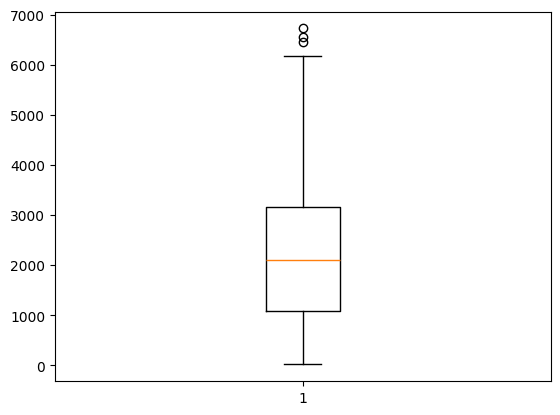

In [34]:
plt.boxplot(df["total_price"])
plt.show()

In [40]:
x=df.groupby("category")["margin_percentage"].mean().reset_index()
x=x.sort_values(by="margin_percentage",ascending=True)
x.head()

,category,margin_percentage
4,Grocery & Staples,15.0
2,Dairy & Breakfast,20.0
9,Pharmacy,20.0
3,Fruits & Vegetables,25.0
5,Household Care,25.0


top 5 product category with lower margin than others

In [41]:
x=x.sort_values(by="margin_percentage",ascending=True)
x.tail()

,category,margin_percentage
1,Cold Drinks & Juices,30.0
7,Personal Care,35.0
8,Pet Care,35.0
10,Snacks & Munchies,35.0
6,Instant & Frozen Food,40.0


top 5 product category with highest margin than others

In [45]:
x=df.groupby("customer_segment")["delay_minutes"].mean().reset_index()
x

,customer_segment,delay_minutes
0,Inactive,6.440336
1,New,9.022913
2,Premium,5.380915
3,Regular,6.351515


here we see clearly that users with premium subscription have less delay minutes and those for the new consumers it is averagely approx 9 minutes which is not good it will lead to loss of the new consumers